In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")


('image.jpg', <http.client.HTTPMessage at 0x7f00b2c5aa50>)

In [ ]:
import cv2

# Задание 1 Работа с шумом


1.   Сгенерировать медианный и гаусов шумы на изображении и отобразить
2.   Применить фильтры на зашумленных изображениях (box filter, фильтр гаусса, медианный фильтр)
3. отобразить результаты



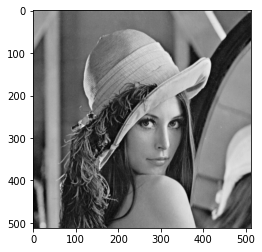

In [ ]:
#Ваш код здесь
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [ ]:
def gauss_noise(img, sigma=0.1):
  row,col= img.shape
  gauss = np.random.normal(0,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  noisy = img + gauss
  return noisy

In [ ]:
gauss_img_01 = gauss_noise(gray_img, 0.1)
gauss_img_1 = gauss_noise(gray_img, 1)
gauss_img_10 = gauss_noise(gray_img, 10)

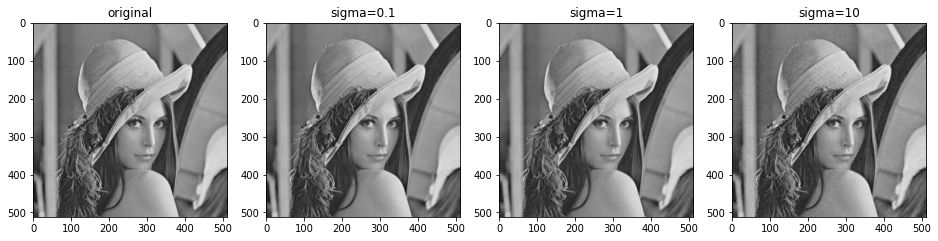

In [ ]:
_, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("original");
axs[1].imshow(gauss_img_01, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("sigma=0.1");
axs[2].imshow(gauss_img_1, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("sigma=1");
axs[3].imshow(gauss_img_10, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("sigma=10");

In [ ]:
def salt_pepper_noise(img, amount=0.004):
  row,col = img.shape
  s_vs_p = 0.5
  out = np.copy(img)
  # Salt mode
  num_salt = np.ceil(amount * img.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
  out[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
  out[coords] = 0
  return out

In [ ]:
sp_img_004 = salt_pepper_noise(gray_img, 0.004)
sp_img_01 = salt_pepper_noise(gray_img, 0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


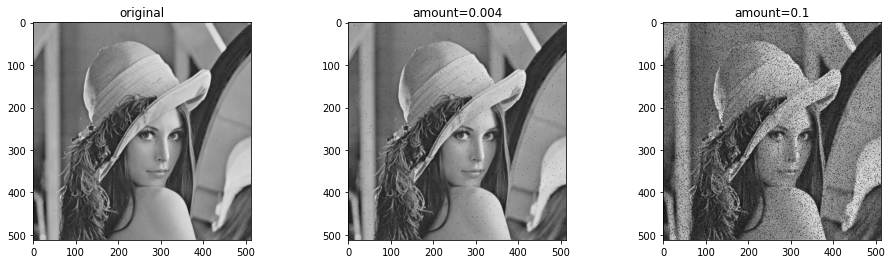

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("original");
axs[1].imshow(sp_img_004, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("amount=0.004");
axs[2].imshow(sp_img_01, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("amount=0.1");

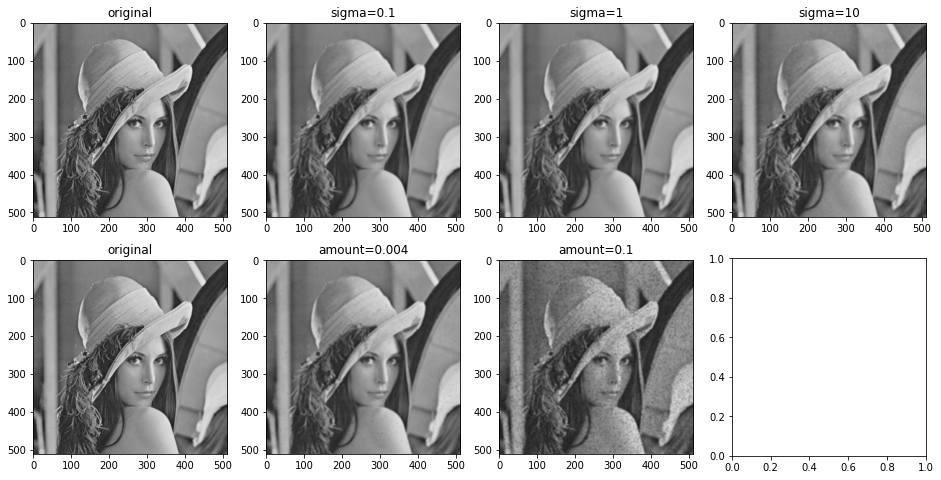

In [ ]:
g = (5,5)
_, axs = plt.subplots(2, 4, figsize=(16, 8))
axs[0][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0][0].set_title("original");
axs[0][1].imshow(cv2.blur(gauss_img_01, g), cmap="gray", vmin=0, vmax=255)
axs[0][1].set_title("sigma=0.1");
axs[0][2].imshow(cv2.blur(gauss_img_1, g), cmap="gray", vmin=0, vmax=255)
axs[0][2].set_title("sigma=1");
axs[0][3].imshow(cv2.blur(gauss_img_10, g), cmap="gray", vmin=0, vmax=255)
axs[0][3].set_title("sigma=10");

axs[1][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[1][0].set_title("original");
axs[1][1].imshow(cv2.blur(sp_img_004, g), cmap="gray", vmin=0, vmax=255)
axs[1][1].set_title("amount=0.004");
axs[1][2].imshow(cv2.blur(sp_img_01, g), cmap="gray", vmin=0, vmax=255)
axs[1][2].set_title("amount=0.1");

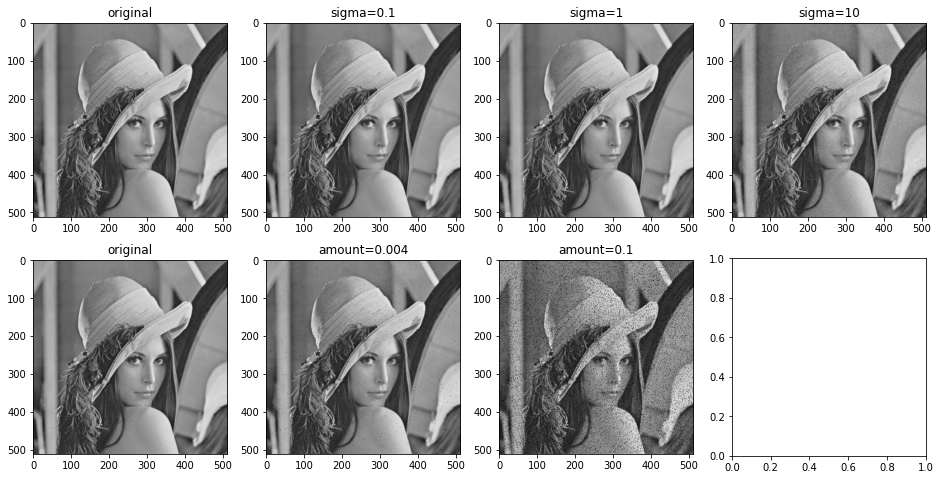

In [ ]:
g = (5,5)
sigma = 0.1
_, axs = plt.subplots(2, 4, figsize=(16, 8))
axs[0][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0][0].set_title("original");
axs[0][1].imshow(cv2.GaussianBlur(gauss_img_01, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][1].set_title("sigma=0.1");
axs[0][2].imshow(cv2.GaussianBlur(gauss_img_1, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][2].set_title("sigma=1");
axs[0][3].imshow(cv2.GaussianBlur(gauss_img_10, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][3].set_title("sigma=10");

axs[1][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[1][0].set_title("original");
axs[1][1].imshow(cv2.GaussianBlur(sp_img_004, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[1][1].set_title("amount=0.004");
axs[1][2].imshow(cv2.GaussianBlur(sp_img_01, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[1][2].set_title("amount=0.1");

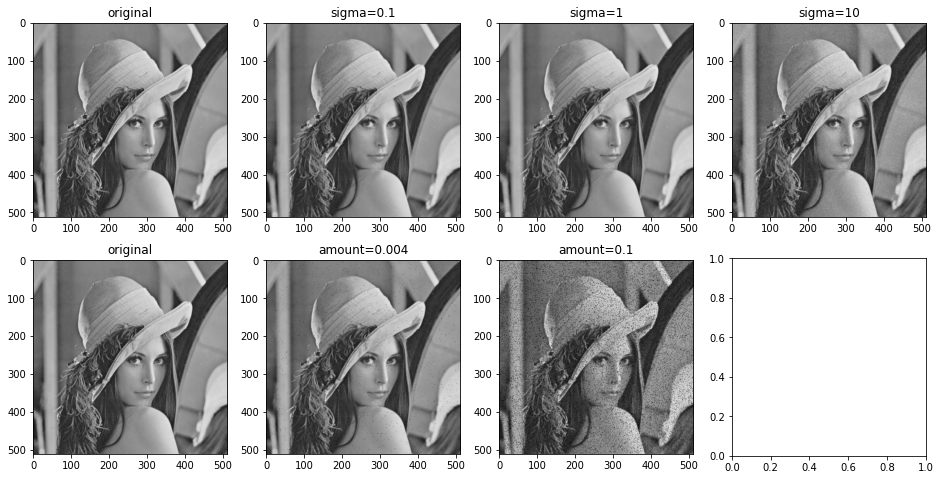

In [ ]:
g = (5,5)
sigma = 0.5
_, axs = plt.subplots(2, 4, figsize=(16, 8))
axs[0][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0][0].set_title("original");
axs[0][1].imshow(cv2.GaussianBlur(gauss_img_01, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][1].set_title("sigma=0.1");
axs[0][2].imshow(cv2.GaussianBlur(gauss_img_1, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][2].set_title("sigma=1");
axs[0][3].imshow(cv2.GaussianBlur(gauss_img_10, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][3].set_title("sigma=10");

axs[1][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[1][0].set_title("original");
axs[1][1].imshow(cv2.GaussianBlur(sp_img_004, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[1][1].set_title("amount=0.004");
axs[1][2].imshow(cv2.GaussianBlur(sp_img_01, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[1][2].set_title("amount=0.1");

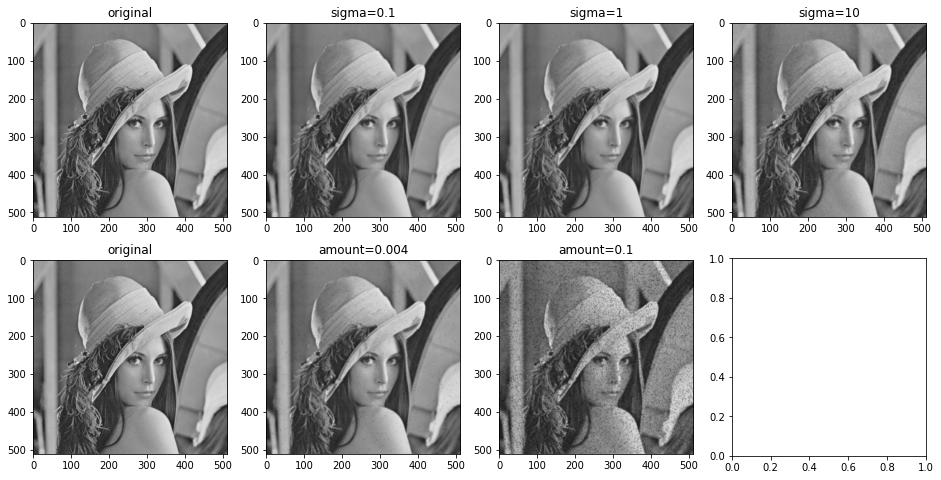

In [ ]:
g = (5,5)
sigma = 1
_, axs = plt.subplots(2, 4, figsize=(16, 8))
axs[0][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0][0].set_title("original");
axs[0][1].imshow(cv2.GaussianBlur(gauss_img_01, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][1].set_title("sigma=0.1");
axs[0][2].imshow(cv2.GaussianBlur(gauss_img_1, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][2].set_title("sigma=1");
axs[0][3].imshow(cv2.GaussianBlur(gauss_img_10, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[0][3].set_title("sigma=10");

axs[1][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[1][0].set_title("original");
axs[1][1].imshow(cv2.GaussianBlur(sp_img_004, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[1][1].set_title("amount=0.004");
axs[1][2].imshow(cv2.GaussianBlur(sp_img_01, g, sigma), cmap="gray", vmin=0, vmax=255)
axs[1][2].set_title("amount=0.1");

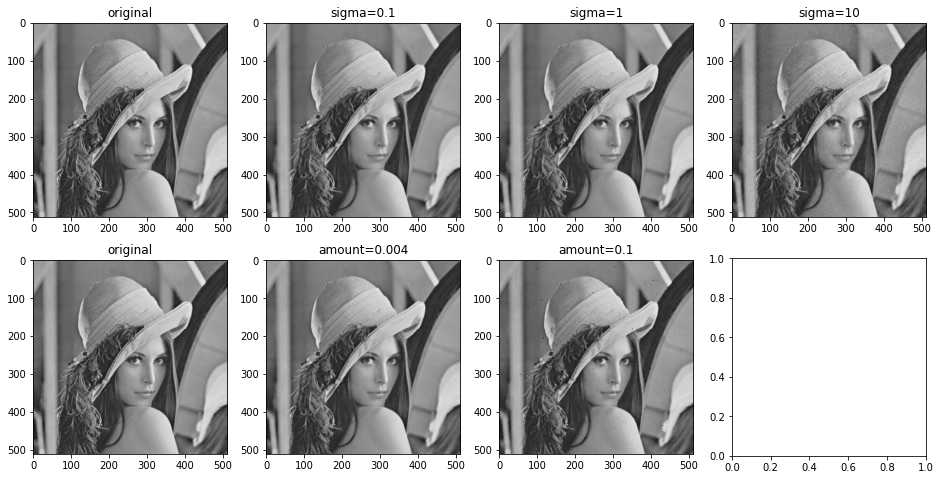

In [ ]:
d = 3
_, axs = plt.subplots(2, 4, figsize=(16, 8))
axs[0][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[0][0].set_title("original");
axs[0][1].imshow(cv2.medianBlur(gauss_img_01.astype('float32'), d), cmap="gray", vmin=0, vmax=255)
axs[0][1].set_title("sigma=0.1");
axs[0][2].imshow(cv2.medianBlur(gauss_img_1.astype('float32'), d), cmap="gray", vmin=0, vmax=255)
axs[0][2].set_title("sigma=1");
axs[0][3].imshow(cv2.medianBlur(gauss_img_10.astype('float32'), d), cmap="gray", vmin=0, vmax=255)
axs[0][3].set_title("sigma=10");

axs[1][0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
axs[1][0].set_title("original");
axs[1][1].imshow(cv2.medianBlur(sp_img_004.astype('float32'), d), cmap="gray", vmin=0, vmax=255)
axs[1][1].set_title("amount=0.004");
axs[1][2].imshow(cv2.medianBlur(sp_img_01.astype('float32'), d), cmap="gray", vmin=0, vmax=255)
axs[1][2].set_title("amount=0.1");

# Задание 2 Детектор границ Canny



In [ ]:
def sob(img, axis):
  result = np.zeros((img.shape[0], img.shape[1]))
  G = [[-1,-2,-1],[0,0,0],[1,2,1]] if axis == "Y" else [[-1,0,1],[-2,0,2],[-1,0,1]]
  for i in range(img.shape[0]-3+1):
    for j in range(img.shape[1]-3+1):
      result[i][j] = np.sum(img[i:i+3, j:j+3]*G)
  return result

In [ ]:
#Ваш код здесь
def Cenny(img, sigma, l_tres = 100, h_tres = 200):
  gauss_img = cv2.GaussianBlur(img, (3, 3), sigma)
  sobel_img_x = sob(gauss_img, "X")
  sobel_img_y = sob(gauss_img, "Y")
  G = np.sqrt(sobel_img_x**2 + sobel_img_y**2)
  #print(G)
  #G = G / G.max() * 255
  theta = np.arctan2(sobel_img_y, sobel_img_x)

  non_max= np.zeros((G.shape[0], G.shape[1]))
  angle = theta * (180.0 / np.pi)
  angle[angle < 0] += 180

  for i in range(1, G.shape[0]-1):
    for j in range(1, G.shape[1]-1):
      q = 255
      r = 255
      if(0 <= angle[i,j] < 22.5) or (157.5 <= angle[i, j] <= 180):
        q = G[i, j+1]
        r = G[i, j-1]
      elif (22.5 <= angle[i,j] < 67.5):
        q = G[i+1, j-1]
        r = G[i-1, j+1]
      elif (67.5 <= angle[i,j] < 112.5):
        q = G[i+1, j]
        r = G[i-1, j]
      elif (112.5 <= angle[i,j] < 157.5):
        q = G[i-1, j-1]
        r = G[i+1, j+1]
      if (G[i,j] >= q) and (G[i,j] >= r):
        non_max[i,j] = G[i,j]
      else:
        non_max[i,j] = 0
  
  
  result = np.zeros((non_max.shape[0], non_max.shape[1]))
  strong_i, strong_j = np.where(non_max >= h_tres)
  zeros_i, zeros_j = np.where(non_max < l_tres)
  weak_i, weak_j = np.where((non_max < h_tres) & (non_max >= l_tres))
  result[strong_i, strong_j] = 255
  result[weak_i, weak_j] = 100
  return result

In [ ]:
Cenny(gray_img, 3, 40, 70)

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

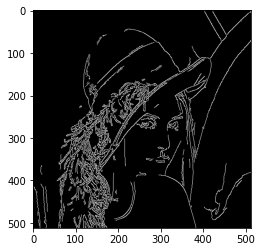

In [ ]:
plt.imshow(cv2.Canny(gray_img, 100, 200), cmap='gray')

Text(0.5, 1.0, 'Cenny')

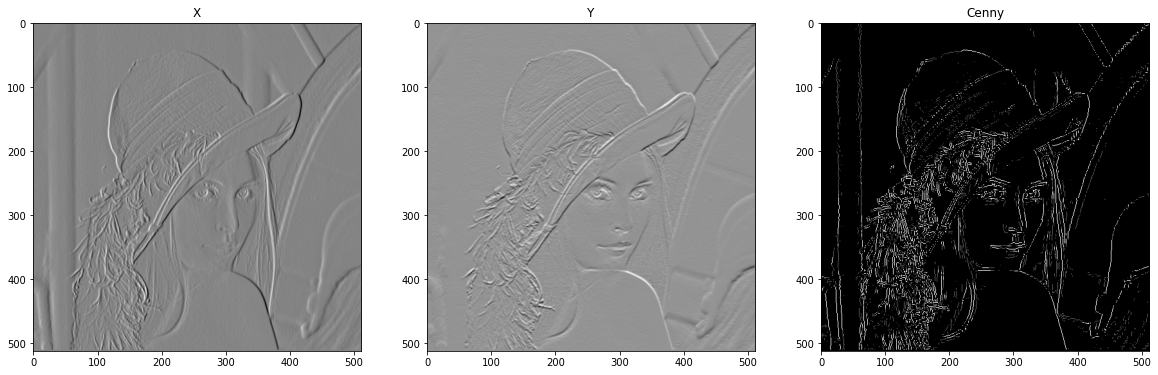

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,10))
axs[0].imshow(sob(gray_img, "X"), cmap='gray')
axs[0].set_title('X')
axs[1].imshow(sob(gray_img, "Y"), cmap='gray')
axs[1].set_title('Y')
axs[2].imshow(Cenny(gray_img, 0, 50, 100), cmap='gray')
axs[2].set_title('Cenny')

# Задание 3 Детектор углов Харриса

In [ ]:
#Ваш код здесь
def detect_harris(img, kernel_size=5, sigma=1, alpha=0.05):
  sobel_img_x = sob(img,"X")
  sobel_img_y = sob(img,"Y")
  sobel_img_xy = sobel_img_x * sobel_img_y
  sobel_img_x2 = sobel_img_x**2
  sobel_img_y2 = sobel_img_y**2

  X = np.arange(-(kernel_size//2), kernel_size//2+1)
  g = np.exp(-(X**2)/(2*sigma**2))
  for i in range(img.shape[0] - kernel_size+1):
    for j in range(img.shape[1] - kernel_size+1):
      sobel_img_x2[i][j] = np.sum(sobel_img_x2[i:i+kernel_size, j:j + kernel_size] * g)
      sobel_img_y2[i][j] = np.sum(sobel_img_y2[i:i+kernel_size, j:j + kernel_size] * g)
      sobel_img_xy[i][j] = np.sum(sobel_img_xy[i:i+kernel_size, j:j + kernel_size] * g)
  term1 = (sobel_img_x2 + sobel_img_y2) / 2
  term2 = np.sqrt((sobel_img_x2 - sobel_img_y2)**2 + 4 * (sobel_img_xy)**2) / 2
  lambda1 = term1 - term2
  lambda2 = term1 + term2
  R = lambda1 * lambda2 - alpha * np.square(lambda1 + lambda2)
  return R


Text(0.5, 1.0, 'Points')

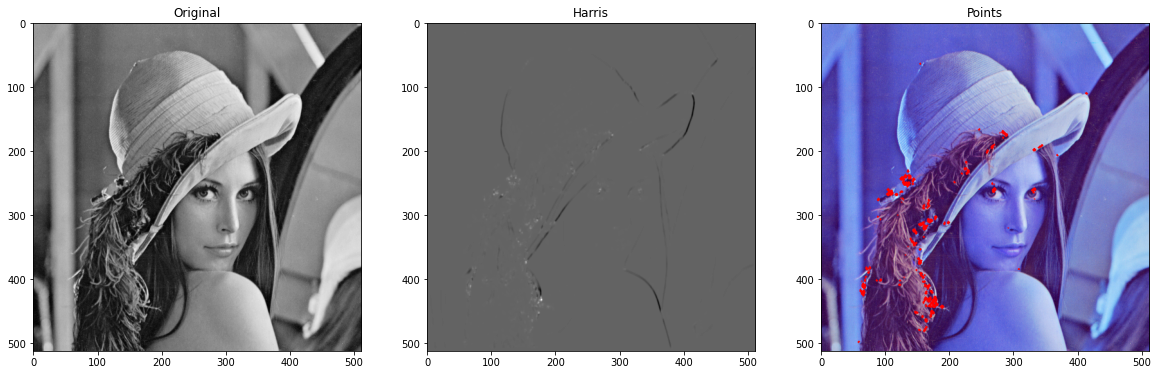

In [ ]:
detected = detect_harris(gray_img)
threshold = 0.05 * detected.max()
show_points = img.copy()

for j in range(0, detected.shape[0]):
  for i in range(0, detected.shape[1]):
    if(detected[j,i] > threshold):
      cv2.circle(show_points, (i,j), 1, 255, 1)

fig, axs = plt.subplots(1,3, figsize=(20,10))
axs[0].imshow(gray_img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(detected, cmap='gray')
axs[1].set_title('Harris')
axs[2].imshow(show_points, cmap='gray')
axs[2].set_title('Points')